In [ ]:
                                 presented to you by : [DATADUDESAADKHAN]

# 1. Data Collection :
Importing the data from Yahoo Finance

In [2]:
import yfinance as yf

In [3]:
# Fetch historical data for a specific stock
stock_symbol = 'AAPL' # Apple Inc.
start_date   = '2017-01-01'
end_date     = '2022-12-31'
stock_data   = yf.download(stock_symbol,start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


# 2. Data Preprocessing :
Clean the data and convert it into a time series format:

In [4]:
import pandas as pd

# Handle missing values
stock_data = stock_data.dropna()


# Convert date to datetime format and set it as index
stock_data.index = pd.to_datetime(stock_data.index)

# Ensure the index is in datetime format and set the frequency
#stock_data.index = pd.to_datetime(stock_data.index, format='%Y-%m-%d')  
# Assuming the date format is 'YYYY-MM-DD'
#stock_data.index.freq = 'D'  
# Set the frequency to 'D' for daily frequency

In [5]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.989265,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.959063,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.096155,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.398224,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.649183,134247600
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.959946,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.142441,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.179680,85438400


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2017-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1510 non-null   float64
 1   High       1510 non-null   float64
 2   Low        1510 non-null   float64
 3   Close      1510 non-null   float64
 4   Adj Close  1510 non-null   float64
 5   Volume     1510 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 82.6 KB


# 3. Exploratory Data Analysis (EDA):
Visualize the data to explore patterns and trends:

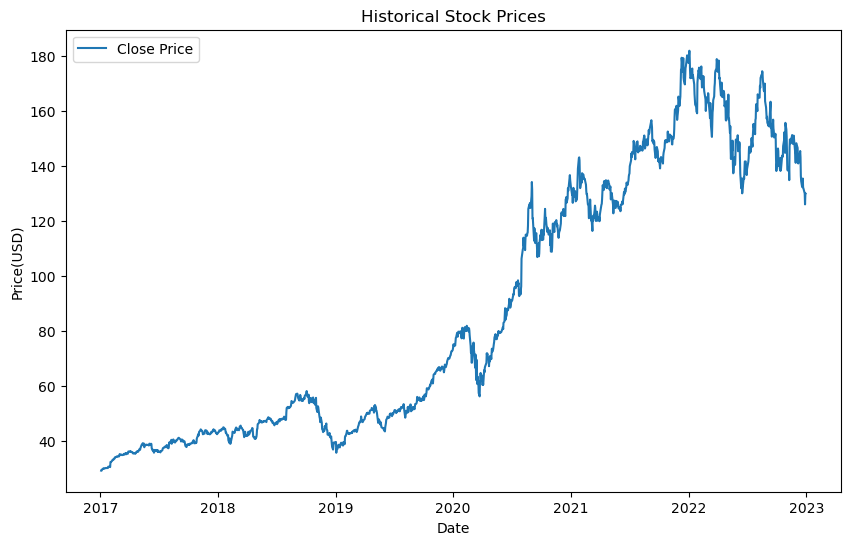

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(stock_data["Close"],label="Close Price")
plt.title('Historical Stock Prices')
plt.xlabel("Date")
plt.ylabel("Price(USD)")
plt.legend()
plt.show()

# 4. Time Series Decomposition :
Decompose the time series into its components

In [8]:
 from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(stock_data['Close'],
                                   model='multiplicative',period=252)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your stock_data DataFrame is already loaded with the correct data
decomposition = seasonal_decompose(stock_data['Close'],
                                   model='multiplicative', period=252)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


In [10]:
decomposition

In [11]:
trend

Date
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
2017-01-06   NaN
2017-01-09   NaN
              ..
2022-12-23   NaN
2022-12-27   NaN
2022-12-28   NaN
2022-12-29   NaN
2022-12-30   NaN
Name: trend, Length: 1510, dtype: float64

In [12]:
seasonal

Date
2017-01-03    1.027617
2017-01-04    1.012624
2017-01-05    1.023578
2017-01-06    1.031102
2017-01-09    1.025929
                ...   
2022-12-23    1.021145
2022-12-27    1.042006
2022-12-28    1.040924
2022-12-29    1.038331
2022-12-30    1.037551
Name: seasonal, Length: 1510, dtype: float64

In [13]:
residual

Date
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
2017-01-06   NaN
2017-01-09   NaN
              ..
2022-12-23   NaN
2022-12-27   NaN
2022-12-28   NaN
2022-12-29   NaN
2022-12-30   NaN
Name: resid, Length: 1510, dtype: float64

In [14]:
from statsmodels.tsa.arima.model import ARIMA

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

# Model Selection and Training
# Example : Using ARIMA model
# Splitting data into train and test sets (considering last 100 days as test set)
train_data = stock_data[:-100]
test_data  = stock_data[-100:]

In [15]:
import itertools
import statsmodels.api as sm

# Define range of p, d, q values
p_values = range(1, 5)  # Example range for p
d_values = range(1, 5)  # Example range for d
q_values = range(1, 7)  # Example range for q

# Generate all possible combinations of p, d, q values
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

# Fit ARIMA models for each combination and evaluate
best_aic = float("inf")
best_params = None

for pdq in pdq_combinations:
    try:
        model = sm.tsa.ARIMA(train_data['Close'], order=pdq)
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_params = pdq
    except:
        continue

print("Best AIC:", best_aic)
print("Best Parameters (p, d, q):", best_params)


Best AIC: 5785.02486684711
Best Parameters (p, d, q): (2, 1, 4)


In [16]:
# Fitting ARIMA model
order = (2,1,4) # Example order (p,d,q)
arima_model = ARIMA(train_data["Close"],order=order)
arima_result= arima_model.fit()

In [17]:
# Model Evaluation
# Predictions
predictions = arima_result.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,typ='levels')

In [18]:
# Evaluation metrics (example:Mean Absolute Error)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_data['Close'],predictions)
print("mean absolute error:", mae)

mean absolute error: 17.14006871134284


In [19]:
# Forecasting 
# Forecassting for future time points
forecast_horizon = 30 # Forecasting for the next 30 days
forecast         = arima_result.forecast(steps=forecast_horizon)

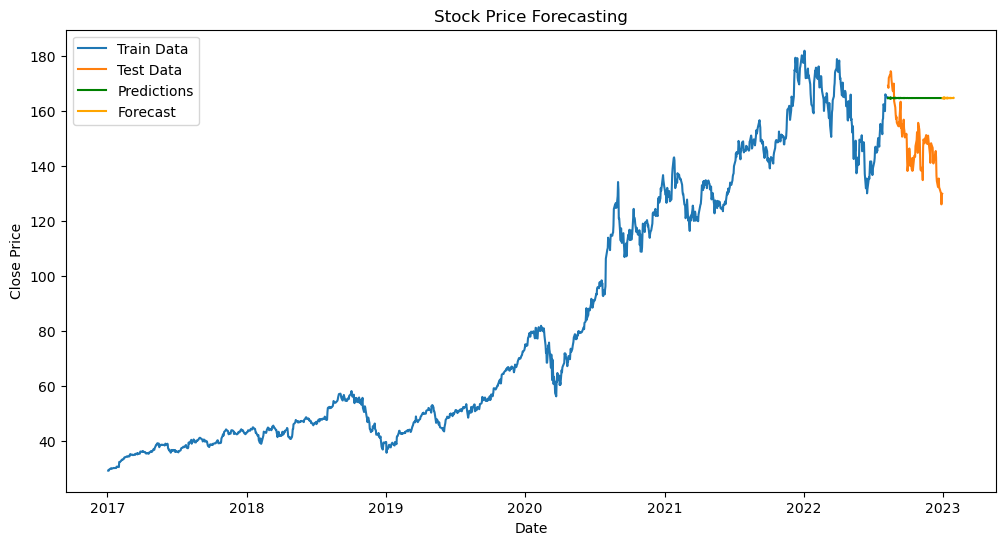

In [20]:
# Interpretation and analysis
# visualize the predictions and forecast
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Train Data')
plt.plot(test_data.index, test_data['Close'], label='Test Data')
plt.plot(test_data.index, predictions, label='Predictions', color='green')
plt.plot(pd.date_range(test_data.index[-1], periods=forecast_horizon+1, 
                       closed='right'), forecast, label='Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Forecasting')
plt.legend()
plt.show()

This is the real Apple Inc. (AAPL) chart extracted from the Yahoo! finance.
Apple Inc. (AAPL)
NasdaqGS - NasdaqGS Real Time Price. Currency in USD

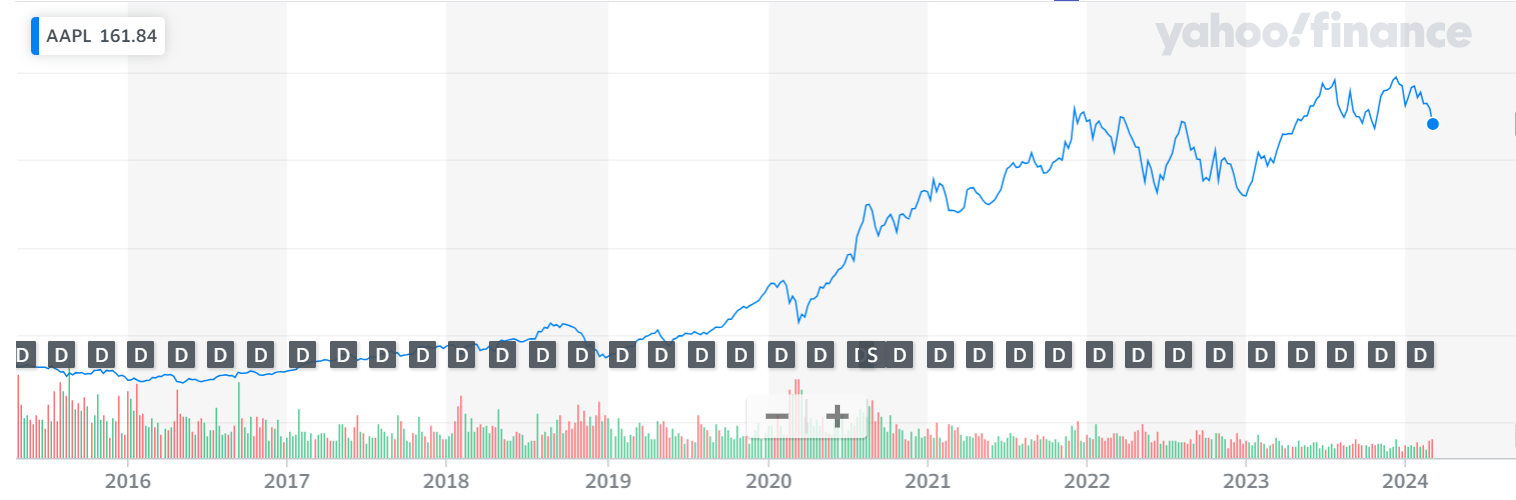

Thus , we can conclude that are model is predicting the same trend as the real world verified trend , which you can compare above .        